# * Name- -Komal
# * Student_id- 33275440

#  SECTION-3

# ---------------------------[Ridge Regression](Part-I)--------------------------------

# Question6-(Part-I)

# Derive the weight update steps of stochastic gradient descent (SGD)

To derive the weight update steps for stochastic gradient descent (SGD) with L2 regularization for linear regression, we start with the regularized error function, which is the sum of the mean squared error and the L2 regularization term:

-Start with the regularized error function:

$$E(\mathbf{w}) = \frac{1}{2n}\sum_{n=1}^{N}(t_n - \mathbf{w}^T\phi(\mathbf{x}_n))^2 + \frac{\lambda}{2}\|\mathbf{w}\|^2$$

where:

$\mathbf{w}$ is the weight vector
$\phi(\mathbf{x}_n)$ is the feature vector for the $n$-th term
$t_n$ is the target value for the $n$-th term

$\lambda$ is the regularization parameter
$\|\mathbf{w}\|^2 = \mathbf{w}^T\mathbf{w}$ is the squared L2 norm of the weight vector
To find the gradient, we split the error function into two parts:

Mean squared error (MSE):
$$E_{\text{MSE}}(\mathbf{w}) = \frac{1}{2n}\sum_{n=1}^{N}(t_n - \mathbf{w}^T\phi(\mathbf{x}_n))^2$$

L2 regularization term:
$$E_{\text{L2}}(\mathbf{w}) = \frac{\lambda}{2}\|\mathbf{w}\|^2$$

The gradient of the MSE term (from Activity 2.1):

$$\nabla E_{\text{MSE}}(\mathbf{w}) = \frac{1}{n}\Phi^T(\Phi\mathbf{w} - \mathbf{t})$$

where $\Phi$ is the design matrix, and $\mathbf{t}$ is the target vector.
The gradient of the L2 regularization term:

$$\nabla E_{\text{L2}}(\mathbf{w}) = \lambda\mathbf{w}$$

Combining the two gradients:

$$\nabla E(\mathbf{w}) = \frac{1}{n}\Phi^T(\Phi\mathbf{w} - \mathbf{t}) + \lambda\mathbf{w}$$

For SGD, the weight update step at each iteration $\tau$:

$$\mathbf{w}\tau = \mathbf{w}{\tau-1} - \eta \nabla E(\mathbf{w}_{\tau-1})$$

Substituting the gradient:

$$\mathbf{w}\tau = \mathbf{w}{\tau-1} - \eta \left(\frac{1}{n}\Phi^T(\Phi\mathbf{w}{\tau-1} - \mathbf{t}) + \lambda\mathbf{w}{\tau-1}\right)$$


Normal Equations:

Setting the gradient to zero:

$$\nabla E(\mathbf{w}) = \frac{1}{n}\Phi^T(\Phi\mathbf{w} - \mathbf{t}) + \lambda\mathbf{w} = 0$$

Solving for $\mathbf{w}$:

$$\frac{1}{n}\Phi^T\Phi\mathbf{w} + \lambda\mathbf{w} = \frac{1}{n}\Phi^T\mathbf{t}$$
$$(\Phi^T\Phi + n\lambda\mathbf{I})\mathbf{w} = \Phi^T\mathbf{t}$$

where 𝐈 is the identity matrix.

#### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Question-6 (Part-II)
#### Using the analytically derived gradient from Step I, implement either a direct or a (stochastic) gradient descent algorithm for Ridge Regression (use again the usual template with init , fit, and predict methods. You cannot use any import from sklearn.linear model for this task.


In [2]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        n_samples = X.shape[0]
        X_offset = np.mean(X, axis=0)
        X_scaled = X - X_offset
        y_offset = np.mean(y)
        y_scaled = y - y_offset

        X_scaled_with_intercept = np.c_[np.ones(n_samples), X_scaled]
        A = np.dot(X_scaled_with_intercept.T, X_scaled_with_intercept) + self.alpha * np.eye(X_scaled_with_intercept.shape[1])
        b = np.dot(X_scaled_with_intercept.T, y_scaled)

        coef_with_intercept = np.linalg.inv(A).dot(b)
        self.intercept_ = coef_with_intercept[0] + y_offset - np.dot(X_offset, coef_with_intercept[1:])
        self.coef_ = coef_with_intercept[1:]

    def predict(self, X):
        return self.intercept_ + np.dot(X, self.coef_)


# Question-6 (Part-III) 
# Synthetic data generator

In [3]:
def generate_data(n_samples):
    X = np.random.uniform(-0.3, 0.3, size=n_samples)
    epsilon = np.random.normal(0, 0.1, size=n_samples)
    y = np.sin(5 * np.pi * X) / (1 + 2 * X) + epsilon
    return X.reshape(-1, 1), y

In [4]:
generate_data(5)

(array([[ 0.11619352],
        [-0.08920021],
        [-0.12916481],
        [ 0.02867999],
        [ 0.24579998]]),
 array([ 0.88762521, -1.09602587, -1.2917564 ,  0.44306081, -0.44196502]))

# (Part-III)
# section-a


### Creating a pipeline of implemented ridge regressor with a polynomial feature transformer with degree 5.Hint: (for λ via numpy.geomspace(10**-10, 0.1, 101, endpoint=True).

In [5]:
# Define the range of lambda values
lambda_values = np.geomspace(10**-10, 0.1, 101, endpoint=True)

# Create a pipeline for ridge regression with polynomial features
def create_ridge_pipeline(lambda_val):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=5)),
        ('ridge', RidgeRegression(alpha=lambda_val))
    ])


In [6]:
lambda_values

array([1.00000000e-10, 1.23026877e-10, 1.51356125e-10, 1.86208714e-10,
       2.29086765e-10, 2.81838293e-10, 3.46736850e-10, 4.26579519e-10,
       5.24807460e-10, 6.45654229e-10, 7.94328235e-10, 9.77237221e-10,
       1.20226443e-09, 1.47910839e-09, 1.81970086e-09, 2.23872114e-09,
       2.75422870e-09, 3.38844156e-09, 4.16869383e-09, 5.12861384e-09,
       6.30957344e-09, 7.76247117e-09, 9.54992586e-09, 1.17489755e-08,
       1.44543977e-08, 1.77827941e-08, 2.18776162e-08, 2.69153480e-08,
       3.31131121e-08, 4.07380278e-08, 5.01187234e-08, 6.16595002e-08,
       7.58577575e-08, 9.33254301e-08, 1.14815362e-07, 1.41253754e-07,
       1.73780083e-07, 2.13796209e-07, 2.63026799e-07, 3.23593657e-07,
       3.98107171e-07, 4.89778819e-07, 6.02559586e-07, 7.41310241e-07,
       9.12010839e-07, 1.12201845e-06, 1.38038426e-06, 1.69824365e-06,
       2.08929613e-06, 2.57039578e-06, 3.16227766e-06, 3.89045145e-06,
       4.78630092e-06, 5.88843655e-06, 7.24435960e-06, 8.91250938e-06,
      

# (Part-III)
# section-b
### Fit each model at least ten times (resampling a training dataset of size 20 each time) for all choices of λ.

In [7]:
n_repetitions = 10
n_train_samples = 20
n_test_samples = 1500


train_errors = np.zeros((n_repetitions, len(lambda_values)))
test_errors = np.zeros((n_repetitions, len(lambda_values)))

for i in range(n_repetitions):
    X_train, y_train = generate_data(n_train_samples)
    X_test, y_test = generate_data(n_test_samples)

    for j, alpha in enumerate(lambda_values):
        model = make_pipeline(PolynomialFeatures(degree=5), RidgeRegression(alpha=alpha))
        model.fit(X_train, y_train)
        train_errors[i, j] = np.mean((model.predict(X_train) - y_train)**2)
        test_errors[i, j] = np.mean((model.predict(X_test) - y_test)**2)

mean_train_errors = np.mean(train_errors, axis=0)
mean_test_errors = np.mean(test_errors, axis=0)


# (Part-III)
# section-c
### Create a plot of mean squared errors (use different colors for the training and testing errors), where the x-axis is log lambda and y-axis is the log mean squared error. 

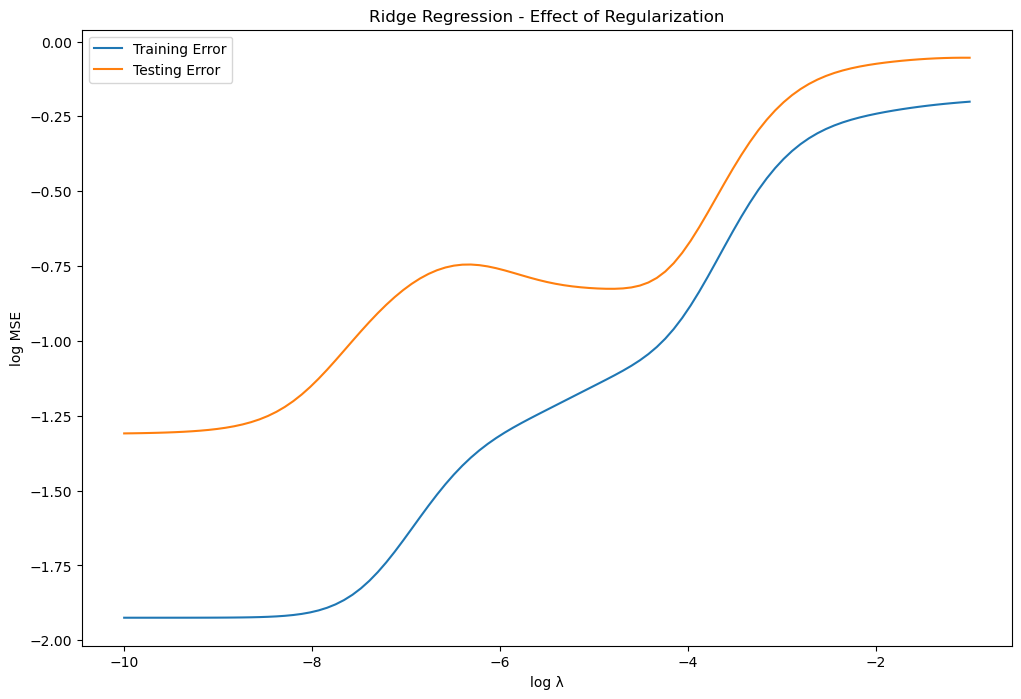

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(np.log10(lambda_values), np.log10(mean_train_errors), label='Training Error')
plt.plot(np.log10(lambda_values), np.log10(mean_test_errors), label='Testing Error')
plt.xlabel('log λ')
plt.ylabel('log MSE')
plt.title('Ridge Regression - Effect of Regularization')
plt.legend()
plt.show()
np.random.seed(142)

### According to above plot-λ, model complexity, and error rates, corresponding to underfitting and overfitting.

* Small values of Lambda-
    * For very small values of λ (log λ < -8), the training error is extremely low, while the testing error is relatively high.This indicates overfitting - the model is too complex and fits the training data very closely, but does not generalize well to unseen testing data. The model has high variance in this region.
* Large values of Lambda-
    * For large values of λ (log λ > -2), the testing error starts increasing significantly again, and the training error also remains high. This indicates the model is underfitting - it is too simple to capture the underlying patterns in both the training and testing data. The model has high bias in this region.
* Around the middle region (-6 < log λ < -2)
   * The training and testing errors are closest. This is likely near the optimal value of λ that balances bias and variance.
   
* Small λ: Complex model, low training error, high testing error (overfitting, high variance)
* Optimal λ: Balanced model complexity, training and testing errors are similar and relatively low
* Large λ: Simple model, high training and testing errors (underfitting, high bias)
The goal is to find such λ that minimizes the testing error by striking the right balance between fitting the training data well but also generalizing to unseen data.

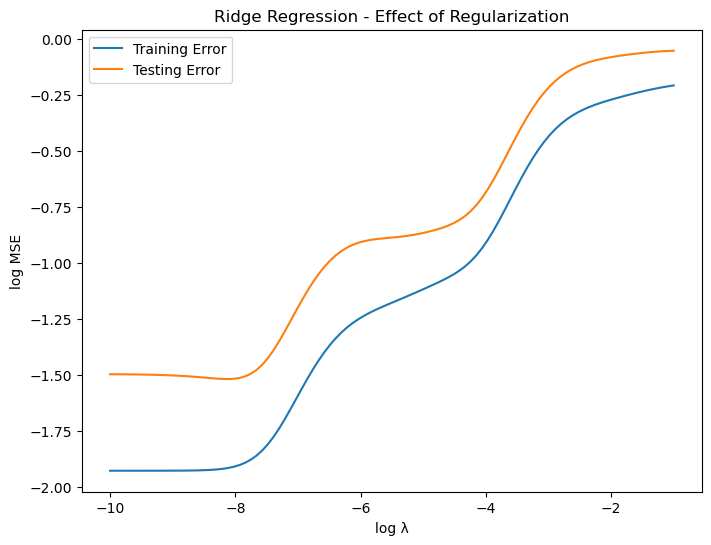

In [9]:
# Generate a large amount of independent test data
X_test_all, y_test_all = generate_data(10000)
np.random.seed(42)
# Fit each model at least ten times (resampling a training dataset of size 20 each time) for all choices of λ.
n_repetitions = 10
n_train_samples = 20
np.random.seed(142)
train_errors = np.zeros((n_repetitions, len(lambda_values)))
test_errors = np.zeros((n_repetitions, len(lambda_values)))

for i in range(n_repetitions):
    X_train, y_train = generate_data(n_train_samples)

    for j, alpha in enumerate(lambda_values):
        model = create_ridge_pipeline(alpha)
        model.fit(X_train, y_train)
        train_errors[i, j] = np.mean((model.predict(X_train) - y_train)**2)
        test_errors[i, j] = np.mean((model.predict(X_test_all) - y_test_all)**2)

mean_train_errors = np.mean(train_errors, axis=0)
mean_test_errors = np.mean(test_errors, axis=0)

# Create a plot of mean squared errors (use different colors for the training and testing errors), where the x-axis is log lambda and y-axis is the log mean squared error.
plt.figure(figsize=(8, 6))
plt.plot(np.log10(lambda_values), np.log10(mean_train_errors ), label='Training Error')
plt.plot(np.log10(lambda_values), np.log10(mean_test_errors ), label='Testing Error')
plt.xlabel('log λ')
plt.ylabel('log MSE')
plt.title('Ridge Regression - Effect of Regularization')
plt.legend()
plt.show()

### large amount of independent test data 

* The training and testing errors follow a similar pattern as before, suggesting that the relationship between lambda, model complexity, and error rates is reliably captured despite the larger test dataset size.
* The testing error curve appears smoother and less noisy compared to the previous plot. 
* The gap between the training and testing error curves is more pronounced and consistent across the range of λ values. This highlights the trade-off between bias and variance more clearly.

* For small values of λ, the model is overfitting (high variance), while for large values of λ, the model is underfitting (high bias).
* Optimal value of λ is more evident in this plot. It appears to be around log(λ) ≈ -4 to -3, which strikes a balance between fitting the training data well and generalizing to unseen data.

    
 * The increased test dataset size provides a more stable and reliable estimate of the model's performance on unseen data. 


#### References-
Tutorial-
Activity 2.1 of Module 2